<a href="https://colab.research.google.com/github/Jiho-korea/DeepLearning/blob/master/kaggle_5%EC%98%88%EC%A0%9C1_%EC%B2%9C%EC%B2%B4%EC%9C%A0%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
!pip install --upgrade tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 27kB/s 
     |████████████████████████████████| 3.8MB 34.7MB/s 
     |████████████████████████████████| 512kB 43.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=3fcb7cc4fed25dc3fb2a15e331821eff8e1999e0e04287ce9c1b8fb7cd9228a0
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
tf.set_random_seed(777)

In [3]:
# 데이터 확인, 분석을 위해 pandas 를 사용
xy_df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/DeepLearningPrac/tensorflowPrac/multinomial/kaggle/천체유형.csv')
xy_df = xy_df.dropna(how='all', axis=0)  # 결측치 제거

In [4]:
# 천체유형 => 갈색왜성 : 0, 적색왜성 : 1, 백색왜성 : 2, 주계열성 : 3, 초거성 : 4, 극대거성 : 5
xy_df.columns = ['온도(K)', '광도(L/Lo)', '반지름(R/Ro)', '절대 등급(Mv)', '색', '스펙트럼형', '천체 유형']  # 칼럼명 한글로 변경
xy_df # 데이터프레임 확인

,온도(K),광도(L/Lo),반지름(R/Ro),절대 등급(Mv),색,스펙트럼형,천체 유형
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [5]:
pd.DataFrame(xy_df.mean(), columns=["평균 값"])

,평균 값
온도(K),10497.462500
광도(L/Lo),107188.361635
반지름(R/Ro),237.157781
절대 등급(Mv),4.382396
천체 유형,2.500000


In [6]:
pd.DataFrame(xy_df.min(), columns=["최솟 값"])

,최솟 값
온도(K),1939
광도(L/Lo),8e-05
반지름(R/Ro),0.0084
절대 등급(Mv),-11.92
색,Blue
스펙트럼형,A
천체 유형,0


In [7]:
pd.DataFrame(xy_df.max(), columns=["최댓 값"])

,최댓 값
온도(K),40000
광도(L/Lo),849420
반지름(R/Ro),1948.5
절대 등급(Mv),20.06
색,yellowish
스펙트럼형,O
천체 유형,5


In [8]:
# 레이블 인코딩 과정 (문자열(종류)을 대응하는 정수로 변경)
colorLabelEncoder = LabelEncoder()
spectralLabelEncoder = LabelEncoder()

In [9]:
xy_df.iloc[:,[4]] = colorLabelEncoder.fit_transform(xy_df.iloc[:,[4]]) # 레이블 인코딩(문자열 레이블->정수)
xy_df.iloc[:,[5]] = spectralLabelEncoder.fit_transform(xy_df.iloc[:,[5]]) # 레이블 인코딩(문자열 레이블->정수)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
colorLabelEncoder.classes_

array(['Blue', 'Blue ', 'Blue White', 'Blue white', 'Blue white ',
       'Blue-White', 'Blue-white', 'Orange', 'Orange-Red',
       'Pale yellow orange', 'Red', 'White', 'White-Yellow', 'Whitish',
       'Yellowish', 'Yellowish White', 'white', 'yellow-white',
       'yellowish'], dtype=object)

In [11]:
spectralLabelEncoder.classes_

array(['A', 'B', 'F', 'G', 'K', 'M', 'O'], dtype=object)

In [12]:
xy_df # 확인

,온도(K),광도(L/Lo),반지름(R/Ro),절대 등급(Mv),색,스펙트럼형,천체 유형
0,3068,0.002400,0.1700,16.12,10,5,0
1,3042,0.000500,0.1542,16.60,10,5,0
2,2600,0.000300,0.1020,18.70,10,5,0
3,2800,0.000200,0.1600,16.65,10,5,0
4,1939,0.000138,0.1030,20.06,10,5,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0,6,5
236,30839,834042.000000,1194.0000,-10.63,0,6,5
237,8829,537493.000000,1423.0000,-10.73,11,0,5
238,9235,404940.000000,1112.0000,-11.23,11,0,5


In [13]:
y_data = xy_df.iloc[:,-1].values.reshape(-1,1)  # 레이블 데이터(종류)를 numpy로 추출

In [14]:
x_data = xy_df.iloc[:,:-1].values  # 피쳐데이터를 numpy로 추출

In [15]:
print(y_data.shape)
print(y_data[:7]) #레이블 확인

(240, 1)
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [16]:
print(x_data.shape)
print(x_data[:7,:]) # 피쳐 확인

(240, 6)
[[3.068e+03 2.400e-03 1.700e-01 1.612e+01 1.000e+01 5.000e+00]
 [3.042e+03 5.000e-04 1.542e-01 1.660e+01 1.000e+01 5.000e+00]
 [2.600e+03 3.000e-04 1.020e-01 1.870e+01 1.000e+01 5.000e+00]
 [2.800e+03 2.000e-04 1.600e-01 1.665e+01 1.000e+01 5.000e+00]
 [1.939e+03 1.380e-04 1.030e-01 2.006e+01 1.000e+01 5.000e+00]
 [2.840e+03 6.500e-04 1.100e-01 1.698e+01 1.000e+01 5.000e+00]
 [2.637e+03 7.300e-04 1.270e-01 1.722e+01 1.000e+01 5.000e+00]]


In [17]:
np.unique(y_data, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([40, 40, 40, 40, 40, 40]))

In [18]:
# 테스트세트를 분리
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, stratify=y_data, random_state=777) # 전체 데이터중 30%

In [19]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([28, 28, 28, 28, 28, 28]))

In [20]:
print("학습용 ",x_train.shape, "\t", y_train.shape) # 학습용 피쳐, 레이블 데이터 
print("테스트용 ",x_test.shape, "\t", y_test.shape) # 테스트용 피쳐, 레이블 데이터

학습용  (168, 6) 	 (168, 1)
테스트용  (72, 6) 	 (72, 1)


In [21]:
scaler = StandardScaler()

In [22]:
nb_classes = 6 # 분류할 클래스의 개수

In [23]:
# 텐서플로우 그래프 그리기
num_x = x_data.shape[1]
X = tf.placeholder(tf.float32, shape=[None, num_x]) 
Y = tf.placeholder(tf.int32, shape=[None, 1])
W = tf.Variable(tf.random.normal([num_x , nb_classes]), name='weight') 
b = tf.Variable(tf.random.normal([nb_classes]), name='bias')

In [24]:
Y_one_hot = tf.one_hot(Y, nb_classes)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])

In [25]:
#softmax 는 벡터 그대로 유지 시킨 상태에서 확률만 표시해 줌 
logits = tf.matmul(X,W) + b
hypothesis = tf.nn.softmax(logits)

In [26]:
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_one_hot)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [27]:
cost = tf.reduce_mean(cost_i)

In [28]:
train = tf.train.GradientDescentOptimizer(learning_rate=1e-2).minimize(cost)

In [29]:
prediction = tf.argmax(hypothesis, 1)

In [30]:
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))

In [31]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [32]:
sess = tf.Session()

In [33]:
sess.run(tf.global_variables_initializer())

In [34]:
w_history = [] # 변화하는 가중치 행렬을 담기위한 리스트
cost_list = [] # 감소하는 cost를 담기위한 리스트

In [35]:
n_fold = 4 # 4개의 폴드
skf = StratifiedKFold(n_splits=n_fold) 
cv_accuracy = [] # 폴드세트별 정확도를 저장할 리스트

In [36]:
epochs = 10001
  
for step in range(epochs):
  fold_cost = 0
  fold_accuracy = 0
  for train_index, test_index in skf.split(x_train, y_train):
    train_random_index = np.random.permutation(train_index)
    test_random_index = np.random.permutation(test_index)

     # 학습폴드, 검증폴드 분리(피쳐, 레이블 별)
    train_feature_fold, val_feature_fold = x_train[train_random_index], x_train[test_random_index]
    train_label_fold, val_label_fold = y_train[train_random_index], y_train[test_random_index]

    # 학습폴드를 기준으로 표준화
    scaler.fit(train_feature_fold)
    
    # 학습폴드를 기준으로 학습폴드, 검증폴드를 표준화
    train_feature_fold_scaled = scaler.transform(train_feature_fold) 
    val_feature_fold_scaled = scaler.transform(val_feature_fold) 

    # 학습폴드로 학습 
    cost_val, W_all, _ = sess.run([cost, W, train], feed_dict={X:train_feature_fold_scaled, Y:train_label_fold})

    fold_cost += cost_val
    w_history.append(W_all.copy())  

    # 폴드세트별 Accuracy 저장 
    fold_accuracy += sess.run(accuracy, feed_dict={X:val_feature_fold_scaled, Y:val_label_fold})


  cv_accuracy.append(fold_accuracy/n_fold) # epoch 별 검증폴드의 평균 Accuracy를 저장한다
  cost_list.append(fold_cost/n_fold) # epoch 별 학습폴드의 평균 cost를 저장한다

  if step % 200 == 0:
    print("step=",step,"\t cost=", fold_cost/n_fold, "\t accuracy=",str(fold_accuracy/n_fold*100)[:5], "%")

step= 0 	 cost= 2.765995144844055 	 accuracy= 10.71 %
step= 200 	 cost= 0.6635154038667679 	 accuracy= 73.21 %
step= 400 	 cost= 0.4776909202337265 	 accuracy= 82.14 %
step= 600 	 cost= 0.40740320086479187 	 accuracy= 88.69 %
step= 800 	 cost= 0.36514168977737427 	 accuracy= 91.07 %
step= 1000 	 cost= 0.3348827287554741 	 accuracy= 92.85 %
step= 1200 	 cost= 0.3113245442509651 	 accuracy= 92.85 %
step= 1400 	 cost= 0.29211635142564774 	 accuracy= 94.64 %
step= 1600 	 cost= 0.2760024294257164 	 accuracy= 94.64 %
step= 1800 	 cost= 0.26221879571676254 	 accuracy= 94.64 %
step= 2000 	 cost= 0.25025658309459686 	 accuracy= 94.64 %
step= 2200 	 cost= 0.2397543601691723 	 accuracy= 95.83 %
step= 2400 	 cost= 0.2304437831044197 	 accuracy= 96.42 %
step= 2600 	 cost= 0.2221195548772812 	 accuracy= 97.02 %
step= 2800 	 cost= 0.2146213948726654 	 accuracy= 97.02 %
step= 3000 	 cost= 0.20782195031642914 	 accuracy= 97.02 %
step= 3200 	 cost= 0.20161907002329826 	 accuracy= 97.02 %
step= 3400 	 co

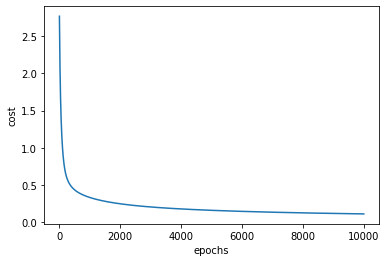

In [37]:
plt.plot(cost_list)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()

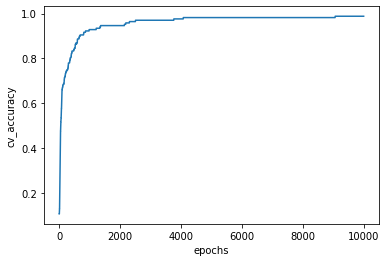

In [38]:
plt.plot(cv_accuracy)
plt.xlabel("epochs")
plt.ylabel("cv_accuracy")
plt.show()

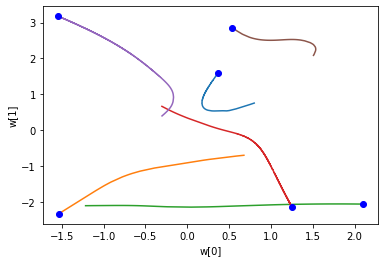

In [39]:
# 가중치 업데이트 과정 그래프 (꽃받침 길이, 꽃받침 너비)
w0 = []
w1 = []
for w in  w_history:
  w0.append(w[0])
  w1.append(w[1])
plt.plot(w0, w1)
plt.plot(w0[-1], w1[-1],'bo')
plt.xlabel('w[0]')
plt.ylabel('w[1]')
plt.show()

In [40]:
# 테스트 세트에 대한 정확도 구하기
x_test_scaled = scaler.transform(x_test)
a = sess.run(accuracy, feed_dict={X:x_test_scaled, Y:y_test})
print("테스트세트 정확도 : ", str(a*100)[:5], "%", sep="")

테스트세트 정확도 : 97.22%


In [41]:
# 임의의 샘플데이터 5개로 예측값 구해보기
X_test_5 = np.array([[10497, 107188, 237, 4, 5, 3], 
                     [1739, 1, 10, -8, 1, 0],
                     [40000, 849420, 1950, 20, 13, 0],      
                     [30000, 500000, 1000, 12, 10, 2],  
                     [35000, 250000, 1500, 15, 7, 4]]) 
X_test_5_scaled = scaler.transform(X_test_5)

In [42]:
print(sess.run(prediction, feed_dict={X:X_test_5_scaled}))

[4 4 5 5 5]


In [43]:
try:
  x_input = input("입력(온도(K), 광도(L/Lo), 반지름(R/Ro), 절대 등급(Mv), 색, 스펙트럼형): ")
  if x_input == 'x':
    raise NotImplementedError
  x_input_strip =[ float(i.strip()) for i in x_input.split(",")]
  print("온도\t광도\t반지름\t절대 등급\t색\t스펙트럼형")
  for i in x_input_strip:
    print(i,end="\t\t")
  print()
  x_input_test = np.array([x_input_strip]).astype('float32')

  x_input_test_scaled = scaler.transform(x_input_test)

  print("예상 결과 : ", (sess.run(prediction, feed_dict={X:x_input_test_scaled}))) 
  
except ValueError:
  print("입력을 다시 확인해주세요")
except NotImplementedError:
  print("종료")

입력(온도(K), 광도(L/Lo), 반지름(R/Ro), 절대 등급(Mv), 색, 스펙트럼형): 10497, 107188, 237, 4, 5, 3
온도	광도	반지름	절대 등급	색	스펙트럼형
10497.0		107188.0		237.0		4.0		5.0		3.0		
예상 결과 :  [4]


In [44]:
result_df = pd.DataFrame(X_test_5, columns=['온도(K)', '광도(L/Lo)', '반지름(R/Ro)', '절대 등급(Mv)', '색', '스펙트럼형'])

In [45]:
result_df

,온도(K),광도(L/Lo),반지름(R/Ro),절대 등급(Mv),색,스펙트럼형
0,10497,107188,237,4,5,3
1,1739,1,10,-8,1,0
2,40000,849420,1950,20,13,0
3,30000,500000,1000,12,10,2
4,35000,250000,1500,15,7,4


In [46]:
result_df['예측 결과'] = sess.run(prediction, feed_dict={X:X_test_5_scaled})

In [47]:
result_df['색'] = colorLabelEncoder.inverse_transform(result_df['색']) # 역 레이블 인코딩(정수->문자열 레이블)
result_df['스펙트럼형'] = colorLabelEncoder.inverse_transform(result_df['스펙트럼형']) # 역 레이블 인코딩(정수->문자열 레이블)

In [48]:
result_df.loc[result_df['예측 결과']==0 , '예측 결과'] = '갈색왜성'
result_df.loc[result_df['예측 결과']==1 , '예측 결과'] = '적색왜성'
result_df.loc[result_df['예측 결과']==2 , '예측 결과'] = '백색왜성'
result_df.loc[result_df['예측 결과']==3 , '예측 결과'] = '주계열성'
result_df.loc[result_df['예측 결과']==4 , '예측 결과'] = '초거성'
result_df.loc[result_df['예측 결과']==5 , '예측 결과'] = '극대거성'

In [49]:
result_df

,온도(K),광도(L/Lo),반지름(R/Ro),절대 등급(Mv),색,스펙트럼형,예측 결과
0,10497,107188,237,4,Blue-White,Blue white,초거성
1,1739,1,10,-8,Blue,Blue,초거성
2,40000,849420,1950,20,Whitish,Blue,극대거성
3,30000,500000,1000,12,Red,Blue White,극대거성
4,35000,250000,1500,15,Orange,Blue white,극대거성


In [50]:
sess.close()